In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *
import astropy
from astropy import constants as ac
import lightkurve

/Users/lupitatovar/anaconda3/lib/python3.10/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/lupitatovar/.lightkurve/cache. Please move all the files in the legacy directory /Users/lupitatovar/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


Columns (20 days of data Sept/Oct 2016)

Time(BJD_TDB-2450000)

flux err_

flux position_x 

position_y 

fwhm 

fwhm_x 

fwhm_y 

background 

texp

In [6]:
spitzerlc = pd.read_csv('spitzer_lc.csv')
spitzerlc
#plt.scatter(spitzerlc.Time.values,spitzerlc.Flux.values)

,Unnamed: 0,Time,Flux,fluxerr,x_pos,y_pos,fwhm,fwhm_x,fwhm_y,bkgd,na,texp
0,0,7440.290155,0.995960,0.000830,16.037032,16.096065,1.1306,1.280963,1.297885,7.681587,1.0,1.92
1,1,7440.291640,0.995621,0.000761,16.051365,16.136889,1.1443,1.280474,1.359159,6.559925,1.0,1.92
2,2,7440.293139,0.993556,0.000879,16.047302,16.121444,1.1385,1.280257,1.330890,6.029081,1.0,1.92
3,3,7440.294645,0.994836,0.000820,16.061065,16.109097,1.1332,1.268556,1.312878,6.284184,1.0,1.92
4,4,7440.296133,0.995061,0.000961,16.062635,16.104222,1.1279,1.263904,1.304400,7.433231,1.0,1.92
...,...,...,...,...,...,...,...,...,...,...,...,...
29298,183,8777.283721,0.999813,0.000883,15.900778,16.060333,1.2310,1.405451,1.342257,10.230150,1.0,1.92
29299,184,8777.285217,0.999738,0.000947,15.904952,16.058968,1.1560,1.398691,1.339653,10.923340,1.0,1.92
29300,185,8777.286715,1.000731,0.000782,15.900381,16.053000,1.2100,1.407723,1.333829,10.201580,1.0,1.92
29301,186,8777.288213,1.001476,0.000814,15.910476,16.050619,1.1880,1.391920,1.327574,10.311040,1.0,1.92


In [7]:
time = spitzerlc['Time'].values
flux = spitzerlc['Flux'].values
flux_err = spitzerlc['fluxerr'].values
xpos = spitzerlc['x_pos'].values
ypos = spitzerlc['y_pos'].values

(7653.0, 7655.0)

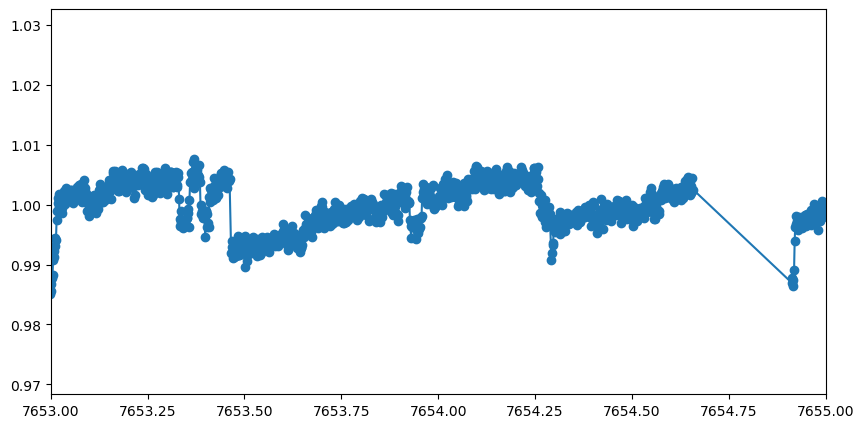

In [9]:
plt.figure(figsize=(10,5))
plt.plot(time,flux,marker='o')
#plt.scatter(df['Time'].values,df['x_pos']-np.median(df['x_pos'].values),marker='o',color='C2')
#plt.scatter(df['Time'].values,df['y_pos']-np.median(df['y_pos'].values),marker='o',color='C1')
plt.xlim(7653,7655)

Text(0.5, 1.0, 'TRAPPIST-1 Spitzer Data')

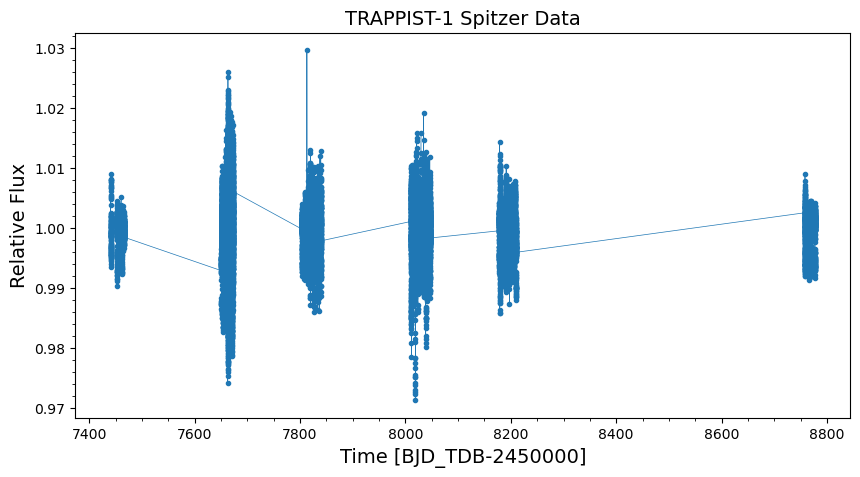

In [10]:
plt.figure(figsize=(10,5))
plt.plot(time,flux,lw=0.5,marker='.')
plt.xlabel('Time [BJD_TDB-2450000]',fontsize=14)
plt.ylabel('Relative Flux',fontsize=14)
plt.minorticks_on()
plt.title('TRAPPIST-1 Spitzer Data',fontsize=14)

Transforming Time units to calendar days

In [11]:
#convert to JD
jd = time + 2450000
jd

array([2457440.290155  , 2457440.29164024, 2457440.29313884, ...,
       2458777.28671474, 2458777.28821264, 2458777.28971014])

In [12]:
from astropy.time import Time
# Convert to astropy Time object + 2450000
t = Time(jd, format='jd')

# Convert to datetime
utc = t.to_datetime()

In [13]:
utc

array([datetime.datetime(2016, 2, 21, 18, 57, 49, 391924),
       datetime.datetime(2016, 2, 21, 18, 59, 57, 716796),
       datetime.datetime(2016, 2, 21, 19, 2, 7, 195837), ...,
       datetime.datetime(2019, 10, 20, 18, 52, 52, 153585),
       datetime.datetime(2019, 10, 20, 18, 55, 1, 572154),
       datetime.datetime(2019, 10, 20, 18, 57, 10, 956124)], dtype=object)

Text(0, 0.5, 'Relative Flux')

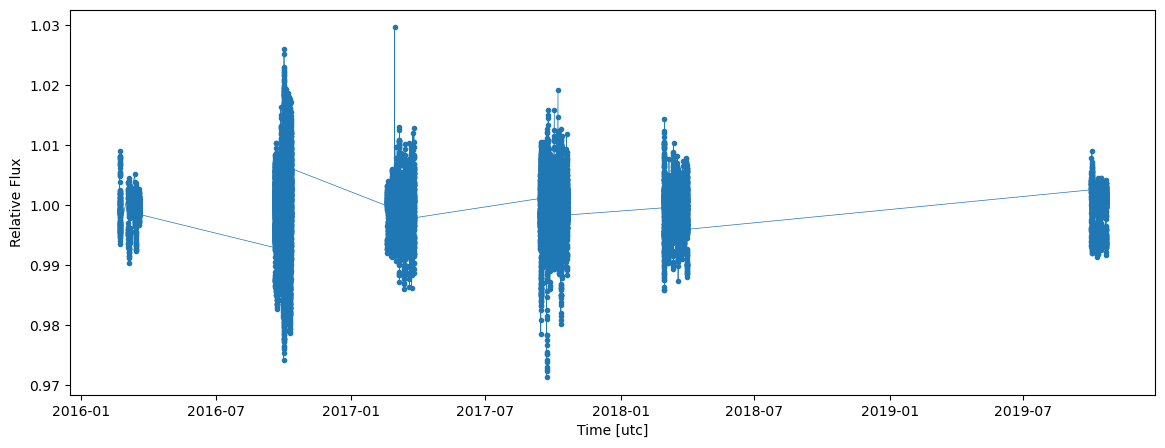

In [14]:
plt.figure(figsize=(14,5))
plt.plot(utc,flux,lw=0.5,marker='.')
plt.xlabel('Time [utc]')
plt.ylabel('Relative Flux')

In [ ]:
#%matplotlib widget

Text(0, 0.5, 'Relative Flux')

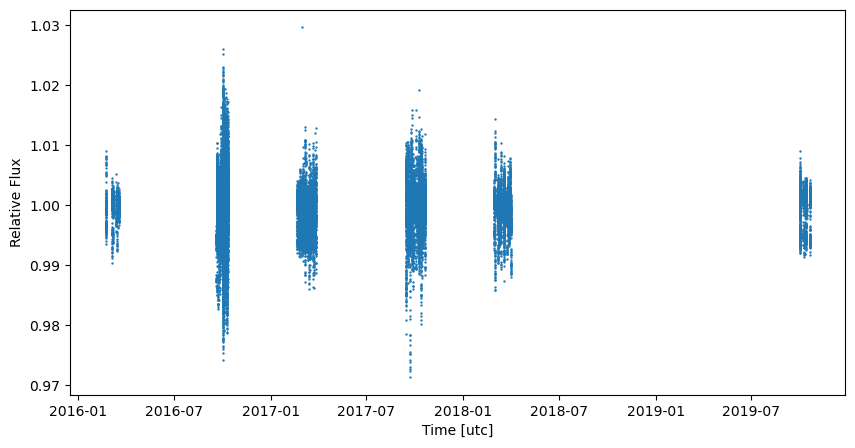

In [15]:
#%matplotlib notebook
plt.figure(figsize=(10,5))
plt.scatter(utc,flux,s=0.5)
plt.xlabel('Time [utc]')
plt.ylabel('Relative Flux')

(0.991, 1.007)

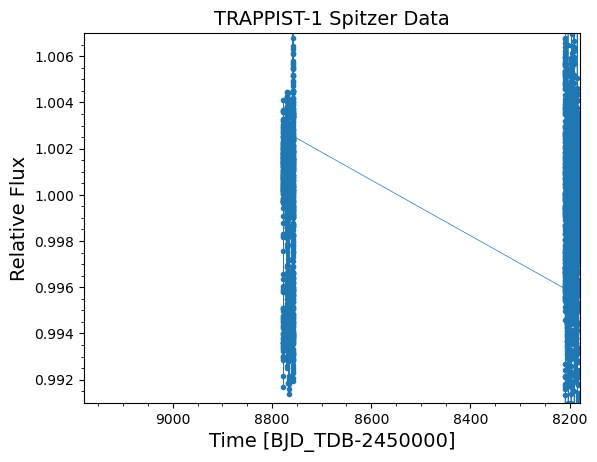

In [16]:
#%matplotlib inline
plt.plot(time,flux,lw=0.5,marker='.')
plt.xlabel('Time [BJD_TDB-2450000]',fontsize=14)
plt.ylabel('Relative Flux',fontsize=14)
plt.minorticks_on()
plt.title('TRAPPIST-1 Spitzer Data',fontsize=14)
plt.xlim(9178.75,8178.95)
plt.ylim(.991,1.007)

### Finding the flares
The first 4 are from Davenport 2019

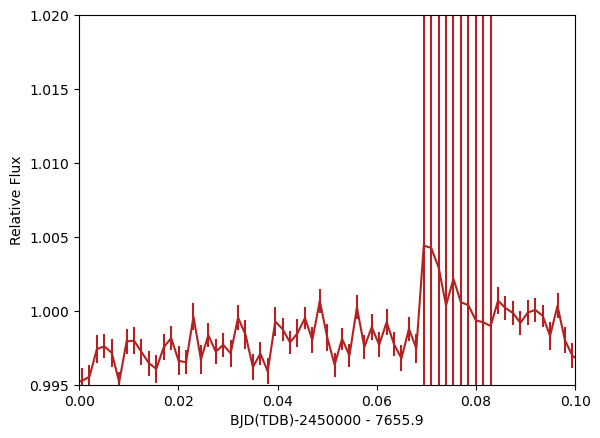

In [17]:
plt.errorbar(time - 7655.9, flux, flux_err, c='FireBrick');
plt.xlim(0,0.1);
plt.ylim(.995,1.02);
plt.xlabel('BJD(TDB)-2450000 - 7655.9');
plt.ylabel('Relative Flux');
#plt.savefig('trappist1_flare1.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

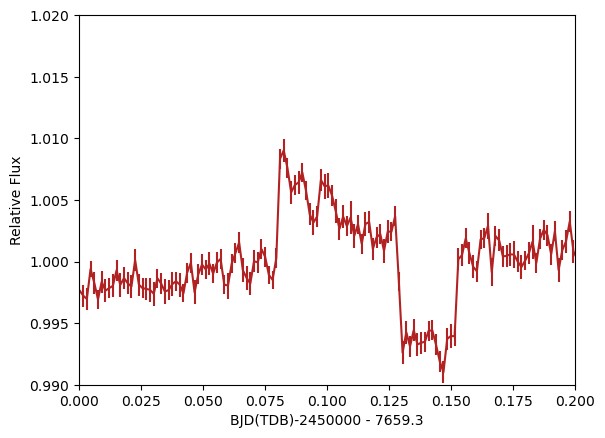

In [18]:
plt.errorbar(time - 7659.3, flux, flux_err, c='FireBrick');
plt.xlim(0,0.2);
plt.ylim(.99,1.02);
plt.xlabel('BJD(TDB)-2450000 - 7659.3');
plt.ylabel('Relative Flux');

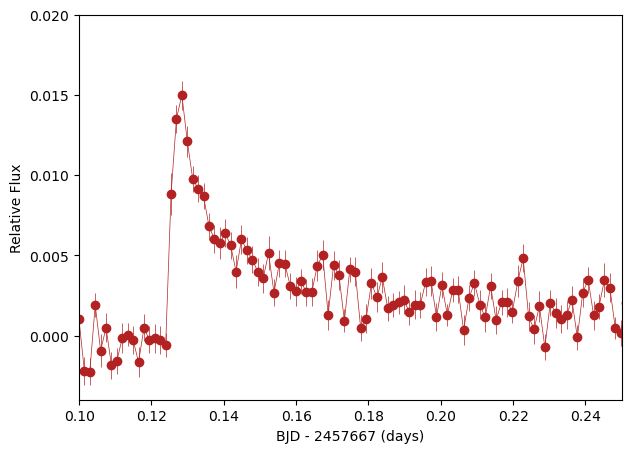

In [20]:
plt.figure(figsize=(7,5))
plt.errorbar(time-7667, flux-1, flux_err, c='FireBrick', marker='o', lw=0.5);
plt.xlim(0.1,.25);
plt.ylim(-.004,.02);
plt.xlabel('BJD - 2457667 (days)');
plt.ylabel('Relative Flux');

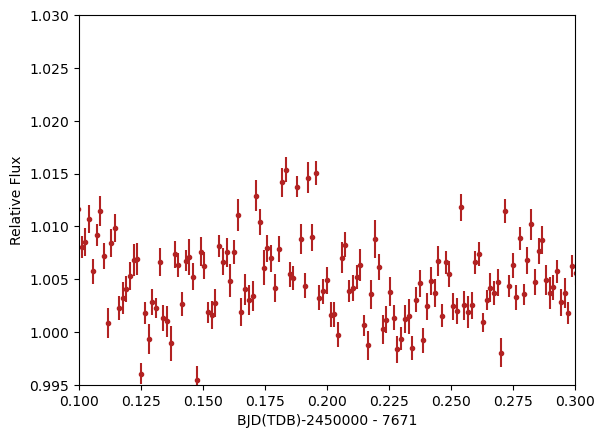

In [21]:
# A 4th little flare
plt.errorbar(time-7671, flux, flux_err, marker='.', linestyle='none', c='FireBrick');
plt.xlim(.1,.3);
plt.ylim(.995,1.03);
plt.xlabel('BJD(TDB)-2450000 - 7671');
plt.ylabel('Relative Flux');

### Loading in the flare data

### Calculating exposure times

In [22]:
exptime = np.median(time[1:] - time[0:-1])
print(exptime)
# totdur = len(df) * exptime
totdur = np.nanmax(time) - np.nanmin(time)
print(totdur)

0.0014977999944676412
1336.9995551411957


In [24]:
#totdur1 = totdur + 2450000
#tot_dur_jd = Time(totdur1, format='jd')
print(tot_dur_jd)
# Convert to datetime
#totdur_utc = tot_dur_jd.to()
#print(totdur_utc)

2451336.999555141


### Calculating equivalent durations:

Integrating the relative flux of a single flare results in a quantity known as the “equivalent duration”
(see Hunt-Walker et al. 2012 https://iopscience.iop.org/article/10.1086/666495/pdf), which has units of time (typically seconds).

ED is defined as the amount of time that it would take the star, in its quiescent state, to release
the same amount of energy released during the flare (time integral)

In [ ]:
ed = np.zeros_like(tstart)
for k in range(len(tstart)):
    x = np.where((time >= tstart[k]) & (time <= tstop[k]))
    ed[k] = np.trapz(flux[x]-1, x=(time[x] * 86400.)) #convert days to min

print(ed)

A flare event with an equivalent duration of P = 1 s has, by definition, an energy equal to the star’s quiescent luminosity integrated for 1 s

### Creating FFD

Flare frequency distribution diagrams tell us about the occurence rate of flares on stars as a function of flare energy.

How many flares of a certain energy are happening per day

x-axis : log (energy of flares) units erg

y-axis: # of flares (days)

In [ ]:
Lo=30.352907 #need to edit this number for T1 Spitzer data
data_sort = np.argsort(flare_table['ed_s'].values)[::-1]
#ED = flare_table['ed_s'].values[sata_sort] #reverse sorted equivalent duration values 
ffd_time = np.nanmedian(np.diff(lc.time.btjd)) * (len(lc.time.btjd)) #number of days of data you have for T1
nu = (np.arange(1, len(ED)+1)) / ffd_time

In [ ]:
ffd_x = np.log10(ED) + (Lo)
ffd_y = np.log10(nu)

### Plotting the FFD

In [ ]:
plt.rcParams['axes.linewidth']=1.5
plt.rcParams["font.size"] = 20
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ['Verdana']

In [ ]:
plt.figure(figsize=[10,6])
plt.minorticks_on()
plt.tick_params(direction='out',width=2,length=6,pad=7)


#Plotting the FFD
plt.plot(tess_x,tess_y,'-o')
plt.xlabel('log E (erg)')
#plt.ylabel(r'log $\nu$ (day$^{-1}$)')
plt.ylabel('# of Flares [day$^{-1}$]')

### Saving FFD arrays to a file

Step 1: save the arrays to a table

step 2: save the table to a file on your computer



In [ ]:
data= {'log_E': ffd_x, 'Freq': ffd_y}
df = pd.DataFrame(data=data)

In [ ]:
#This saves the table to a .csv file on your computer
#df.to_csv('spitzer_ffd.csv')